In [30]:
import tensorflow as tf
from tensorflow import keras

cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images / 255.0
test_images  = test_images / 255.0

train_images = tf.reshape(train_images, (50000, 32, 32, 3))
test_images  = tf.reshape(test_images, (10000, 32, 32, 3))

# model
model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(32, 32, 3)))
model.add(keras.layers.Conv2D(4, (3, 3), 
                              activation='relu', 
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 4)         112       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 4)        0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 1024)              0         
                                                                 
 dense_14 (Dense)            (None, 128)               131200    
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 132,602
Trainable params: 132,602
Non-trainable params: 0
________________________________________________

In [23]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history_data = model.fit(train_images, train_labels, 
                         validation_data=(test_images, test_labels), 
                         batch_size=1024, epochs=200)

Epoch 1/200
49/49 [==============================] - 2s 25ms/step - loss: 2.1161 - accuracy: 0.2492 - val_loss: 1.9098 - val_accuracy: 0.3254
Epoch 2/200
49/49 [==============================] - 1s 18ms/step - loss: 1.8055 - accuracy: 0.3676 - val_loss: 1.7261 - val_accuracy: 0.4014
Epoch 3/200
49/49 [==============================] - 1s 19ms/step - loss: 1.6772 - accuracy: 0.4174 - val_loss: 1.6354 - val_accuracy: 0.4292
Epoch 4/200
49/49 [==============================] - 1s 19ms/step - loss: 1.6065 - accuracy: 0.4432 - val_loss: 1.5829 - val_accuracy: 0.4519
Epoch 5/200
49/49 [==============================] - 1s 19ms/step - loss: 1.5581 - accuracy: 0.4598 - val_loss: 1.5514 - val_accuracy: 0.4654
Epoch 6/200
49/49 [==============================] - 1s 19ms/step - loss: 1.5211 - accuracy: 0.4749 - val_loss: 1.5181 - val_accuracy: 0.4739
Epoch 7/200
49/49 [==============================] - 1s 20ms/step - loss: 1.4944 - accuracy: 0.4817 - val_loss: 1.5033 - val_accuracy: 0.4787
Epoch 

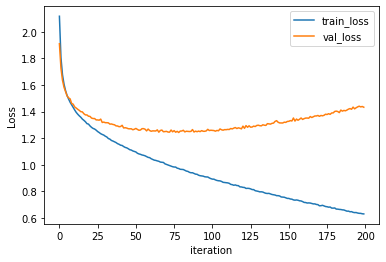

In [24]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['loss'], label = "train_loss")
plt.plot(history_data.history['val_loss'], label = "val_loss")
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

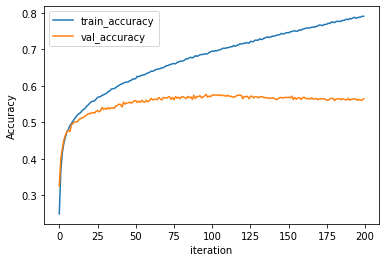

In [25]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['accuracy'], label = "train_accuracy")
plt.plot(history_data.history['val_accuracy'], label = "val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [26]:
def construct_model():
    inp = keras.layers.Input(shape=[32, 32, 3])  

    # get edges
    edges = tf.image.sobel_edges(inp) # 32, 32, 6
    edges = tf.keras.layers.Reshape((32, 32, 6))(edges)

    # get gradient
    # plot_lbp_model ....
    
    
    dx, dy = tf.image.image_gradients(inp)     
    x = tf.keras.layers.Concatenate(axis=3)([dx, dy, edges])

    # reshape
    x = tf.keras.layers.Reshape((32, 32, 12))(x)
    
    
    
    

    # down-sample and flatten
    x = keras.layers.MaxPooling2D(2)(x)
    x = keras.layers.Flatten()(x)
    
    # FCLs
    x = keras.layers.Dense(128, activation='relu')(x)
    x = keras.layers.Dense(10, activation='softmax')(x)

    return tf.keras.Model(inputs=[inp], outputs=x)

# model
model = construct_model()
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 tf.compat.v1.shape_6 (TFOpLamb  (4,)                0           ['input_9[0][0]']                
 da)                                                                                              
                                                                                                  
 tf.compat.v1.shape_5 (TFOpLamb  (4,)                0           ['input_9[0][0]']                
 da)                                                                                              
                                                                                            

In [27]:
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images / 255.0
test_images  = test_images / 255.0

train_images = tf.reshape(train_images, (50000, 32, 32, 3))
test_images  = tf.reshape(test_images, (10000, 32, 32, 3))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history_data = model.fit(train_images, train_labels, 
                         validation_data=(test_images, test_labels), 
                         batch_size=1024, epochs=200)

Epoch 1/200
49/49 [==============================] - 2s 28ms/step - loss: 1.9866 - accuracy: 0.3072 - val_loss: 1.7927 - val_accuracy: 0.3897
Epoch 2/200
49/49 [==============================] - 1s 22ms/step - loss: 1.6765 - accuracy: 0.4376 - val_loss: 1.6501 - val_accuracy: 0.4430
Epoch 3/200
49/49 [==============================] - 1s 22ms/step - loss: 1.5336 - accuracy: 0.4905 - val_loss: 1.5645 - val_accuracy: 0.4757
Epoch 4/200
49/49 [==============================] - 1s 22ms/step - loss: 1.4365 - accuracy: 0.5257 - val_loss: 1.5085 - val_accuracy: 0.4902
Epoch 5/200
49/49 [==============================] - 1s 22ms/step - loss: 1.3598 - accuracy: 0.5520 - val_loss: 1.4711 - val_accuracy: 0.5032
Epoch 6/200
49/49 [==============================] - 1s 22ms/step - loss: 1.2974 - accuracy: 0.5740 - val_loss: 1.4446 - val_accuracy: 0.5080
Epoch 7/200
49/49 [==============================] - 1s 22ms/step - loss: 1.2409 - accuracy: 0.5928 - val_loss: 1.4325 - val_accuracy: 0.5152
Epoch 

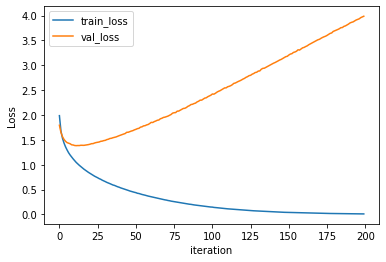

In [28]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['loss'], label = "train_loss")
plt.plot(history_data.history['val_loss'], label = "val_loss")
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

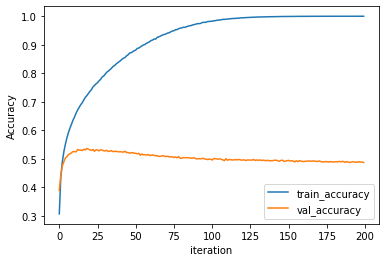

In [29]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['accuracy'], label = "train_accuracy")
plt.plot(history_data.history['val_accuracy'], label = "val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()